# Example Notebook for Correcting and loading FastCCD Images

This example reads data from the FastCCD and corrects and rotates the images. Included are some
example of widgets to interact with the data

## Getting Started

Load the ``databroker`` moudle, ``csxtools`` and various other dependencies

In [1]:
import numpy as np
from databroker import DataBroker, get_table
from csxtools.utils import get_fastccd_images
from csxtools.ipynb import image_stack_to_movie, show_image_stack
%matplotlib inline
from matplotlib import pyplot as plt

Set the logger level to info to see logging output

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)

## Get the data!

Load the headers without the images (using ``fill=False``)

In [3]:
bgnd = DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
print(bgnd)
get_table(bgnd, fill=False)

INFO:databroker.databroker:Interpreting key = ce5042b7-00ae-49ca-9b11-b10c5661aaaa as a str



header
  
  EventDescriptor
  ---------------
  +-----------------------+--------+------------+-------+----------------------------------+
  | data keys             | dtype  |  external  | shape |              source              |
  +-----------------------+--------+------------+-------+----------------------------------+
  | delta                 | number |            |   []  |    XF:23ID1-ES{Dif-Ax:Del}Mtr    |
  | epu1_gap              | number |            |   []  |  XF:23ID-ID{EPU:1-Ax:Gap}Pos-SP  |
  | epu1_phase            | number |            |   []  | XF:23ID-ID{EPU:1-Ax:Phase}Pos-SP |
  | epu2_gap              | number |            |   []  |  XF:23ID-ID{EPU:2-Ax:Gap}Pos-SP  |
  | epu2_phase            | number |            |   []  | XF:23ID-ID{EPU:2-Ax:Phase}Pos-SP |
  | eta                   | number |            |   []  |  XF:23ID1-ES{Diag:1-Ax:Eta}Mtr   |
  | fccd_acquire_period   | number |            |   []  | XF:23ID1-ES{FCCD}:AcquirePeriod  |
  | fccd_acquire_time  

,time,sclr_chan4,epu2_gap,delta,slt2_yc,sx,fccd_stats_total3,pgm_energy,temp_a,fccd_image_lightfield,...,sclr_chan8,npty,epu1_phase,slt2_yg,saz,nptx,fccd_stats_total4,slt1_yc,ring_curr,sclr_chan7
1,2015-10-22 00:10:38.185091-04:00,2122834,31.020917,38.999985,-5.0001,6.899999,86706314,929.897551,0,7180b59d-5112-428e-b6a4-9bc8893220b0,...,0,-26.662465,-0.000045,-1.776357e-15,4.175332,-1.79327,50712759,-0.3004,150.056366,0


In [4]:
data = DataBroker['b2596f8e-d220-4aea-8a55-8ccb17cbdacc'] #[52436]
get_table(data, fill=False)

INFO:databroker.databroker:Interpreting key = b2596f8e-d220-4aea-8a55-8ccb17cbdacc as a str


,time,sclr_chan4,epu2_gap,delta,slt2_yc,sx,fccd_stats_total3,pgm_energy,temp_a,fccd_image_lightfield,...,sclr_chan8,npty,epu1_phase,slt2_yg,saz,nptx,fccd_stats_total4,slt1_yc,ring_curr,sclr_chan7
1,2015-10-21 23:59:54.531477-04:00,2128440,31.020912,38.999985,-5.0001,6.899999,86779381,929.879892,0,20eed5d8-05e2-4b0e-bd3c-5edae7b15878,...,0,-26.66246,-0.000045,-1.776357e-15,4.175332,-1.79326,50762635,-0.3004,150.018917,0


## Correct the FastCCD Images

Now correct the CCD images, using only a single background image. 

In the future this should be taken from the metadata associated with the data, or from the darkfield entry

First lets just look at the background stack as a "lightfield"

In [5]:
images = get_fastccd_images(data, (bgnd, None, None), tag='fccd_image_lightfield')

INFO:csxtools.utils:Took 5.603 seconds to read data using get_images
INFO:csxtools.fastccd.images:Correcting image stack of shape (1, 1200, 960, 960)
INFO:csxtools.fastccd.images:Not correcting for darkfield. No input.
INFO:csxtools.fastccd.images:Not correcting for flatfield. No input.
INFO:csxtools.fastccd.images:Corrected image stack in 0.717 seconds
INFO:csxtools.utils:Computed dark images in 41.408 seconds
INFO:csxtools.utils:Took 8.737 seconds to read data using get_images
INFO:csxtools.fastccd.images:Correcting image stack of shape (1, 1200, 960, 960)
INFO:csxtools.fastccd.images:Not correcting for flatfield. No input.
INFO:csxtools.fastccd.images:Corrected image stack in 0.733 seconds


## Now lets do an interactive plotting widget!

Thanks ``ipywidgets``!

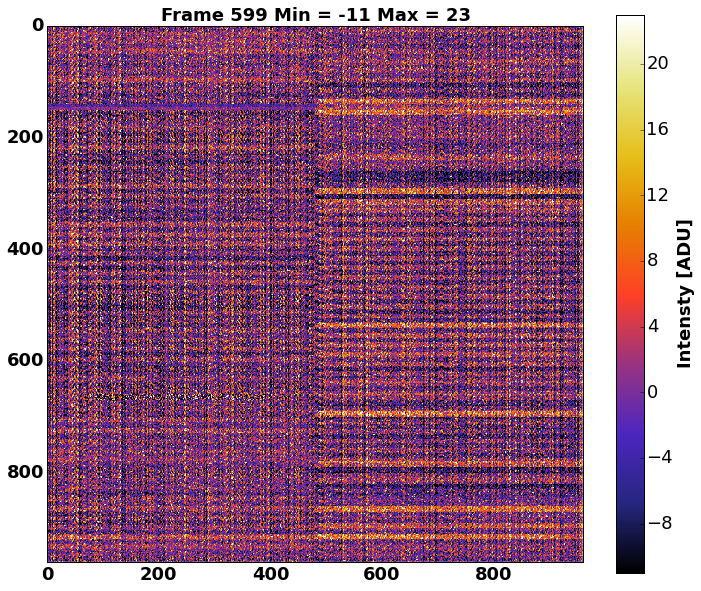

In [6]:
show_image_stack(images[0], (-100, 100))

## And lets do a movie of the stack of images
This produces an HTML5 movie which can be viewed in most browsers

In [7]:
image_stack_to_movie(images[0], frames=10, figsize=(12, 10), vmin=-20, vmax=20)

What version are we running?

In [8]:
import csxtools
csxtools.__version__

'0.1.0+3.g871beb3.dirty'